(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-10-10/notebook/code_demo.ipynb)

# Time Series Data Operations

## Basic Python library - `datetime`

### timestamps and dates

In [1]:
import datetime

In [2]:
dts = datetime.datetime(year=2023,month=1,day=1,hour=0,minute=0,second=0)
dts

datetime.datetime(2023, 1, 1, 0, 0)

In [3]:
print(f"The year: {dts.year}")
print(f"The year: {dts.month}")
print(f"The year: {dts.day}")
print(f"The year: {dts.hour}")
print(f"The year: {dts.minute}")
print(f"The year: {dts.second}")

The year: 2023
The year: 1
The year: 1
The year: 0
The year: 0
The year: 0


In [4]:
dt = datetime.date(year=2023, month=1, day=1)
dt

datetime.date(2023, 1, 1)

In [5]:
ts = datetime.time(hour=0, minute=0, second=1)
ts

datetime.time(0, 0, 1)

| Type      | Description                                                                     |
|-----------|---------------------------------------------------------------------------------|
| date      | Store calendar date (year, month, day) using the Gregorian calendar             |
| time      | Store time of day as hours, minutes, seconds, and microseconds                  |
| datetime  | Store both date and time                                                        |
| timedelta | The difference between two datetime values (as days, seconds, and microseconds) |
| tzinfo    | Base type for storing time zone information                                     |

In [6]:
current_dts = datetime.datetime.now()
current_dts

datetime.datetime(2023, 10, 8, 14, 41, 14, 714995)

In [7]:
current_dt = datetime.datetime.now().date()
current_dt

datetime.date(2023, 10, 8)

In [8]:
current_dt = datetime.date.today()
current_dt

datetime.date(2023, 10, 8)

### time `delta`

```python
A timedelta object represents a duration, the difference between two dates or times.

class datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
```
[[Official Documentation](https://docs.python.org/3/library/datetime.html#timedelta-objects)]

In [9]:
delta = datetime.datetime.now.date() - datetime.datetime(2023,1,1)
delta

AttributeError: 'builtin_function_or_method' object has no attribute 'date'

In [10]:
delta = current_dt - datetime.datetime(2023,1,1)
delta

TypeError: unsupported operand type(s) for -: 'datetime.date' and 'datetime.datetime'

In [11]:
delta = current_dt - datetime.date(2023,1,1)
delta

datetime.timedelta(days=280)

In [12]:
type(delta)

datetime.timedelta

In [13]:
print(f"Diff in days: {delta.days}")
print(f"Diff in seconds: {delta.seconds}")

Diff in days: 280
Diff in seconds: 0


### Conversion between `string` and `datetime`
`strftime()` vs. `strptime()`
[[Official Documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)]

In [14]:
dts = datetime.datetime(2023,1,1)
str(dts)

'2023-01-01 00:00:00'

In [15]:
dts.strftime('%Y-%m-%d')

'2023-01-01'

In [17]:
dts_str = '2023-01-01'
datetime.datetime.strptime(dts_str, '%Y-%m-%d')

datetime.datetime(2023, 1, 1, 0, 0)

In [20]:
import pandas as pd

dts_strs = ['2023-01-01 00:00:00', '2023-01-02 00:00:00', None]
pd.to_datetime(dts_strs)

DatetimeIndex(['2023-01-01', '2023-01-02', 'NaT'], dtype='datetime64[ns]', freq=None)

`Pandas`' datetime module is built on top of the `datetime` module but extends it to provide additional functionality that is useful for data analysis and manipulation. 

## `timeseries` in Pandas
Time series data could be represented as a Pandas `Series` with timestamp index values

In [21]:
import numpy as np

In [22]:
dates = [
    datetime.datetime(2023,1,1),
    datetime.datetime(2023,1,2),
    datetime.datetime(2023,1,3),
    datetime.datetime(2023,1,4),
    datetime.datetime(2023,1,5),
    datetime.datetime(2023,1,6)
]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2023-01-01    1.033219
2023-01-02   -0.604558
2023-01-03    1.046813
2023-01-04   -1.074005
2023-01-05    0.165620
2023-01-06    1.190591
dtype: float64

In [24]:
ts.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq=None)

In [29]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

`pandas.Timestamp` vs. `datetime.datetime`
```python
class pandas.Timestamp(ts_input=<object object>, year=None, month=None, day=None, hour=None, minute=None, second=None, microsecond=None, tzinfo=None, *, nanosecond=None, tz=None, unit=None, fold=None)
```
Pandas replacement for python datetime.datetime object.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. It’s the type used for the entries that make up a DatetimeIndex, and other timeseries oriented data structures in pandas.

[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas-timestamp)]

**ATTENTION**
</br>
</br>
A `pandas.Timestamp` can be substituted most places where you would use a `datetime` object. The reverse is not true, however, because `pandas.Timestamp` can store nanosecond precision data, while `datetime` stores only up to `microseconds`. Additionally, `pandas.Timestamp` can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations.

In [31]:
ts.index[0]

Timestamp('2023-01-01 00:00:00')

In [28]:
ts[0:2]

2023-01-01    1.033219
2023-01-02   -0.604558
dtype: float64

In [26]:
ts[::2]

2023-01-01    1.033219
2023-01-03    1.046813
2023-01-05    0.165620
dtype: float64

Arithmetic operations between differently indexed time series automatically align on the dates:

In [25]:
ts + ts[::2]

2023-01-01    2.066438
2023-01-02         NaN
2023-01-03    2.093626
2023-01-04         NaN
2023-01-05    0.331240
2023-01-06         NaN
dtype: float64

## Create time series data out of a file

In [39]:
min_daily_temperature = pd.read_csv('../data/daily-min-temperatures.csv')
min_daily_temperature.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [41]:
# min_daily_temperature.set_index('Date')
min_daily_temperature.set_index('Date', inplace=True)
min_daily_temperature.head(3)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [43]:
import matplotlib.pyplot as plt

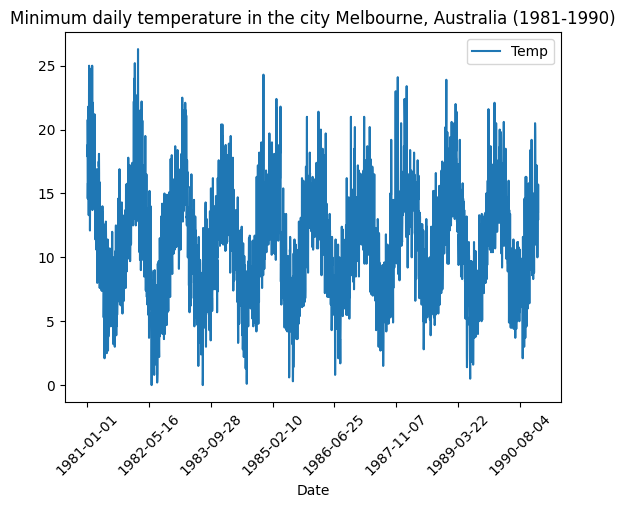

In [44]:
min_daily_temperature.plot(title='Minimum daily temperature in the city Melbourne, Australia (1981-1990)')
plt.xticks(rotation=45)
plt.show()

## Select time series data in Pandas

### Select by `Series` index/label

In [32]:
ts

2023-01-01    1.033219
2023-01-02   -0.604558
2023-01-03    1.046813
2023-01-04   -1.074005
2023-01-05    0.165620
2023-01-06    1.190591
dtype: float64

In [33]:
label = ts.index[1]
ts[label]

-0.6045575794136874

In [34]:
ts["2023-01-02"]

-0.6045575794136874

### Select by time slices
For longer time series, you could also use a year or a year and month string to select the corresponding slices of data

In [54]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range("2021-01-01", periods=1000))
longer_ts.head(3)

2021-01-01    0.663047
2021-01-02   -1.428849
2021-01-03    0.897028
Freq: D, dtype: float64

In [55]:
print(f"min_date: {longer_ts.index[0]}")
print(f"max_date: {longer_ts.index[-1]}")

min_date: 2021-01-01 00:00:00
max_date: 2023-09-27 00:00:00


In [56]:
longer_ts['2022'].head(3)

2022-01-01    1.176429
2022-01-02   -1.374061
2022-01-03   -1.150527
Freq: D, dtype: float64

In [57]:
longer_ts['2022-05'].head(3)

2022-05-01    0.038596
2022-05-02   -0.154975
2022-05-03    0.009415
Freq: D, dtype: float64

### Select by `datetime` values

In [58]:
longer_ts[datetime.datetime(2023,1,1)]

0.6211730207460737

In [59]:
ts_range = longer_ts[datetime.datetime(2023,1,1): datetime.datetime(2023,1,31)]
print(f"min_date: {ts_range.index[0]}")
print(f"max_date: {ts_range.index[-1]}")

min_date: 2023-01-01 00:00:00
max_date: 2023-01-31 00:00:00


### Select with `truncate()`

```python
Series.truncate(before=None, after=None, axis=None, copy=None)
```
Truncate a Series or DataFrame before and after some index value. This is a useful shorthand for boolean indexing based on index values above or below certain thresholds.


[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.truncate.html#pandas-series-truncate)]

In [61]:
longer_ts.truncate(before='2023-01-01', after='2023-01-05')

2023-01-01    0.621173
2023-01-02    1.200538
2023-01-03   -0.393135
2023-01-04   -1.105128
2023-01-05   -0.652792
Freq: D, dtype: float64